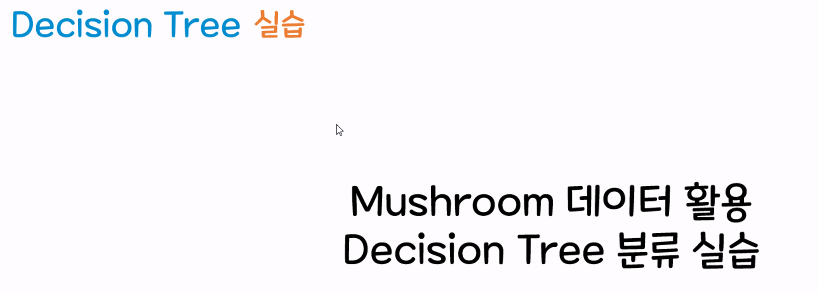

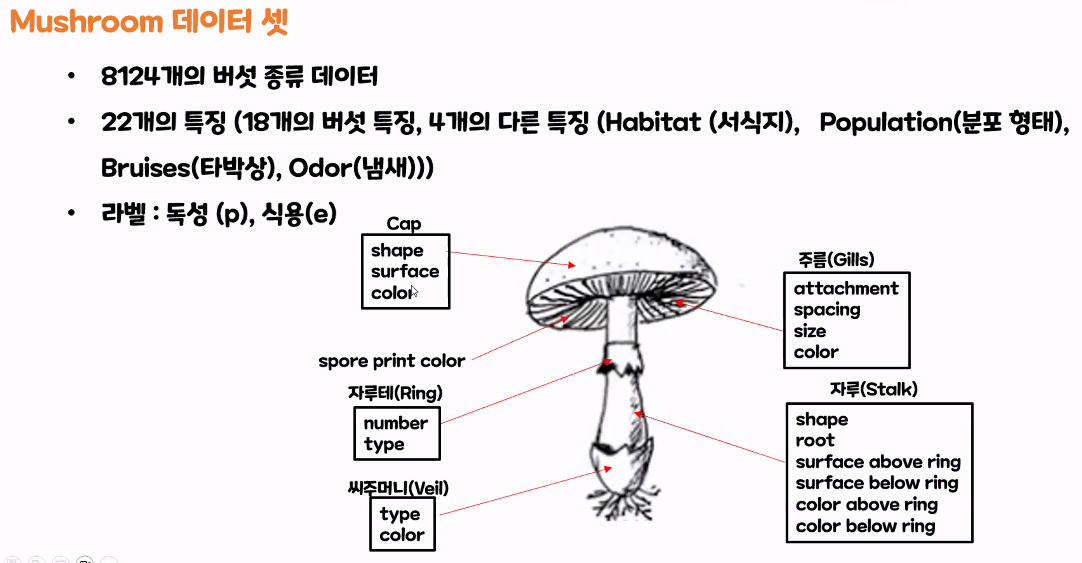

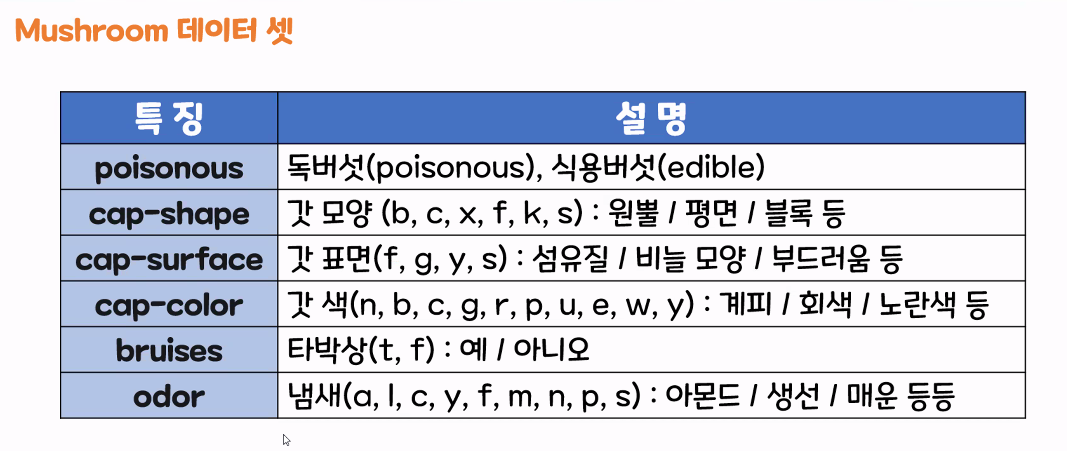

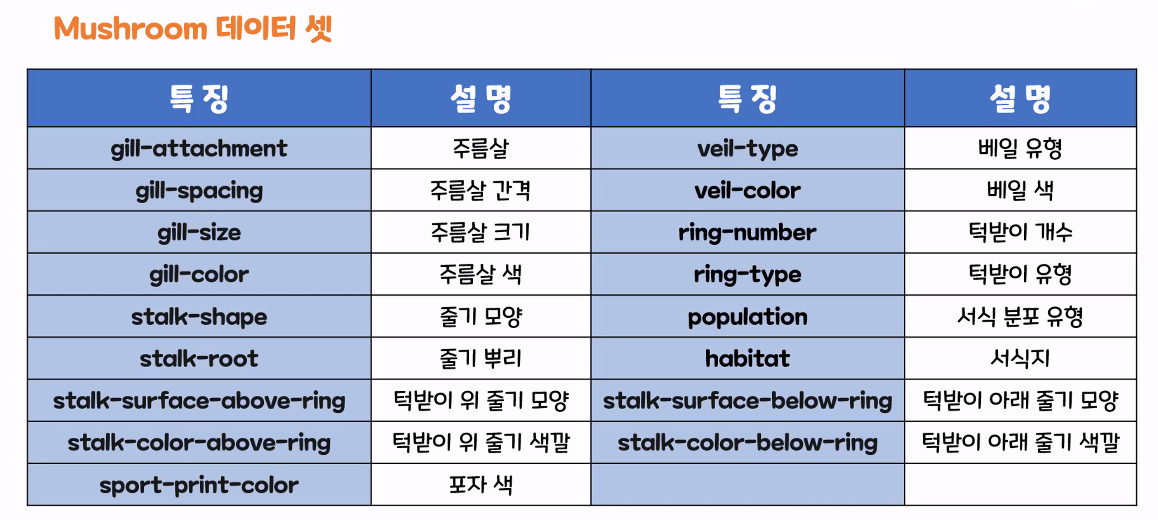

### 문제 정의 (목표 설정)
- 8천여개의 버섯 데이터를 활용해서 독버섯 / 식용버섯인지 분류를 해보자.
- 결정 트리 모델을 시각화 해보자.
- 정답을 맞추는 부분에서 많은 역할을 하는 특성을 확인해보자.

In [15]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 데이터 수집(데이터 로드)
- 제공된 mushroom.csv파일 읽어오기

In [16]:
data = pd.read_csv('./data/mushroom.csv')
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [17]:
# info() - 데이터프레임의 간략한 정보를 파악하는 함수
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [19]:
# 기술 통계 확인
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


    bmi  = 수치형 데이터   - 평균 / 표준편차 / 사분위수
    버섯 = 범주형          - 빈도수 / 고유값 개수 / 최대값 = 가장많은 데이터 -> 개수

unique - 고유한  
top - 최대값  
freqency - 빈도수

### 데이터 전처리
결측치  
- 결측치 없었다.  


전처리  
- 학습용 데이터이기 때문에 이미 정제된 데이터 제공


### 탐색적 데이터 분석(EDA)

In [20]:
# 신규 라이브러리 등장
# matplotlib 라이브러리는 시각화의 기본!
# seaborn 라이브러리를 이용해서 깔끔한 그래프를 그려보고 기능을 추가해보자

import seaborn as sns # 판다스와 호환이 잘됨!!!!

<AxesSubplot:xlabel='cap-shape', ylabel='count'>

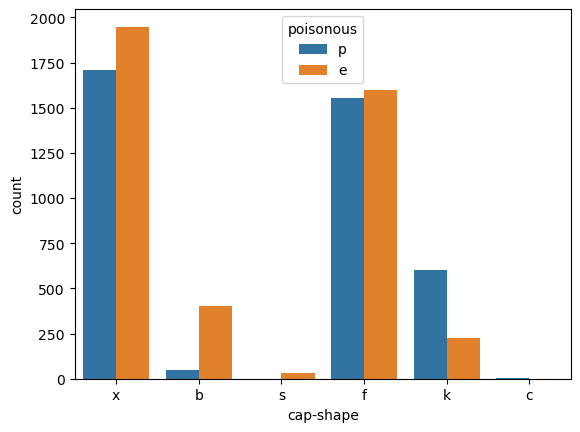

In [21]:
# countplot : 막대그래프 / matplotlib plt.bar

sns.countplot(data = data, # 데이터 프레임 넣어주는 곳
              x='cap-shape', # x축에 데이터를 넣어주는 곳
              hue = 'poisonous' # 해당하는 컬럼의 값들 개수가  bar차트로 출력되게 만들어주는 부분 + 범례

             )


# e = 먹을수 있는거
# p = 못 먹는거 

<AxesSubplot:xlabel='cap-surface', ylabel='count'>

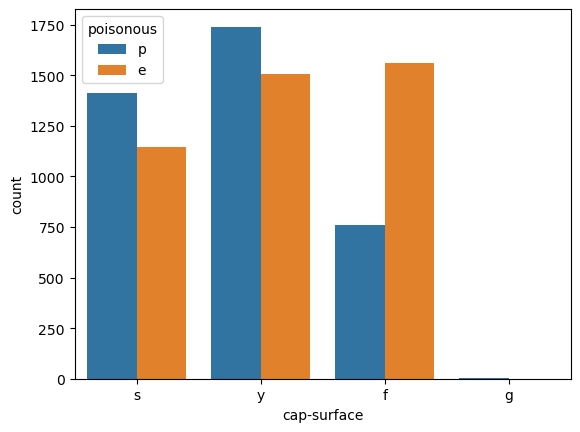

In [22]:
# countplot : 막대그래프 / matplotlib plt.bar

sns.countplot(data = data, # 데이터 프레임 넣어주는 곳
              x='cap-surface', # x축에 데이터를 넣어주는 곳
              hue = 'poisonous' # 해당하는 컬럼의 값들 개수가  bar차트로 출력되게 만들어주는 부분 + 범례

             )


# e = 먹을수 있는거
# p = 못 먹는거 

 - 갓의 표면이 s, y인 데이터는 못먹는 버섯이 많다.
 - 갓 표면이 f인 데이터는 먹을 수 있는 버섯이 많다.
 - 갓 표면이 g 인 데이터는 먹으면 큰일난다. 독버섯이다.
 - cap-surface 특성에선 f값을 가지고 데이터를 판단하면 독성과 식용을 잘 구분하겠구나.

### 모델링
- 데이터 분리, 모델 선택, 하이퍼 파라미터 튜닝, 학습, 평가 , 시각화

In [24]:
data
# poisonous 정답데이터
# poisonous 부터 끝까지 문제데이터

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [25]:
data

KeyError: 0

In [28]:
# 데이터 분리
# 1-1 문제와 정답 분리

# 인덱싱 열데이터
# 

X = data.iloc[:, 1 : ] 
y = data['poisonous']

# 데이터 확인
print(X.shape)
print(y.shape)


#(8124, 22)
#(8124,)

# 문제 데이터 컬럼 22개

(8124, 22)
(8124,)


In [29]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [30]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

In [ ]:
# 5,686

In [1]:
# 머신러닝 모델도 알파벳을 인식할까?

from sklearn.tree import DecisionTreeClassifier

In [2]:
tree_test = DecisionTreeClassifier()


In [3]:
tree_test.fit(X, y)
# 머신러닝 모델은 기본적으로 숫자값을 입력받길 기대한다 
# 숫자가 아닌 데이터를 이용할 시 에러가 발생한다.
# 알파벳 범주형을 숫자값으로 변경해주는 작업이 필요하다.(인코딩)
# 인코딩 에는 두가지의 방법이 있다. (라벨인코딩, 원핫인코딩)

NameError: name 'X' is not defined

** 라벨 인코딩 / 레이블 인코딩 **

- 특성의 유니크한 값의 개수에 따라 숫자를 1씩 증가시켜 mapping 하는 방법
- 회귀파트처럼 연속된 숫자를 다루는 알고리즘에서는 1,2,3... 같이 커지는 숫자가 숫자에 따른 순서나 중요도로 인식될 가능성이 높아서 잘못된 결과가 나올수 있음
- 분류에서만 쑬 수 있다.

In [37]:
X['cap-shape'].unique()


array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [38]:
X['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [39]:
# 레이블 인코딩 before
X['cap-shape']

0       x
1       x
2       b
3       x
4       x
       ..
8119    k
8120    x
8121    f
8122    k
8123    x
Name: cap-shape, Length: 8124, dtype: object

In [40]:
# 레이블 인코딩 after
X['cap-shape'].map({'x':0, 'b':1, 's':2, 'f':3, 'k':4, 'c':5})

0       0
1       0
2       1
3       0
4       0
       ..
8119    4
8120    0
8121    3
8122    4
8123    0
Name: cap-shape, Length: 8124, dtype: int64

In [42]:
# 비효율적

# ->

# 레이블 인코딩을 쉽게 하기위한 레이블 인코더 import
# 전처리할때 자주 사용하는 것들이 모여있는 preprocessing
from sklearn.preprocessing import LabelEncoder

In [43]:


# 인코더 객체 생성
encoder = LabelEncoder()
# 레이블 인코더로 학습시키기(cap-shape의 unique 값들을 기계한테 인식)
encoder.fit(X['cap-shape'])
# 학습된 인코더에 문자를 숫자로 변환
labels = encoder.transform(X['cap-shape'])
labels

array([5, 5, 0, ..., 2, 3, 5])

**원핫 인코딩**
- 모든 데이터를 0/1로 변환을 시킴
- 데이터를 변환 시킬 때 데이터 내부의 고유값 만큼 컬럼을 생성하고 
    해당하는 데이터라면 1  그 외의 데이터는 0
- 컴퓨터는 2진법으로 모든 데이터를 처리한다. 그래서 원핫 인코딩을 사용하면 기계가 직관적으로 이해하기 편하다.
  


사이킷런에서 제공하지만 더 편하게 바꿀수 있다

In [44]:
# pd.get_dummies() : 데이터를 원핫 인코딩 시켜주는 함수
X_one_hot = pd.get_dummies(X)
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
# 문제 데이터를 숫자로

1 인코딩 두번하기 싫어서
    문제가 하나로 뭉쳐있을때 인코딩을 진행

2 각기 다른 인코딩이 진행되는걸 사전에 방지

label =  8124 x 22  

one_hot = 8124 x 117 


문제는 인코딩이 끝났습니다. 근데 정답은요?
- 정답은 기계가 학습할 필요가 없다. 비교만 하면 된다. 그래서 인코딩이 필요없다



In [45]:
# 데이터 분할
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_one_hot,y, 
                                                    test_size=0.3,
                                                   random_state=10)

# 순서는 외워야 한다!!!

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5686, 117)
(2438, 117)
(5686,)
(2438,)


In [49]:
# 모델 객체 생성
tree_model = DecisionTreeClassifier() # 기본 모델 사용

In [53]:
# 모델 학습
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
# 모델 정확도 평가(train 셋) - score 함수 이용
tree_model.score(X_train, y_train)

1.0

In [61]:
tree_model.score(X_test, y_test)

1.0

### 트리모델 내부 시각화 해보기
- tree의 모양을 보기위해 외부 라이브러리인 graphviz 설치


- anaconda prompt -> pip install graphviz / conda install graviz 실행

- c드라이브 -> 사용자 > pc이름 > anaconda3 > Library > include 에서 graphviz 복사

- c드라이브 -> 사용자 > pc이름 > anaconda3 > Lib > site-packages > 붙여넣기

ㄱㄱㄱㄱㄱㄱㄱㄱㄷㅂㅈㄷㄱㅂㄱㄱㄷㅅㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱㄱ

In [62]:
# 모델 시각화 진행하기
from sklearn.tree import export_graphviz

In [63]:
X_one_hot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [67]:
# 파일 내보내기
export_graphviz(tree_model, #시각화 시켜줄 모델의 이름
               out_file='tree.dot', # 파일 명 및 저장 경로 설정
               feature_names = X_one_hot.columns, # 원핫 인코딩 된 컬럼명 기입
               class_names = ['독', '식용'], # 클래스(label)이름 설정
                impurity = True, # 지니불순도 표시
               filled = True) # 노드가 클래스로 구분 되도록 색상 채워주기

In [79]:
# 내보낸 파일을 가지고 모델 시각화 해보기
import graphviz

In [78]:
# tree.dot 이라는 파일을 불러올때 utf8 로 인코딩 해오고 이거 f 라고 줄여 부를거야
with open('tree.dot', encoding='UTF8') as f :
    dot_graph = f.read()

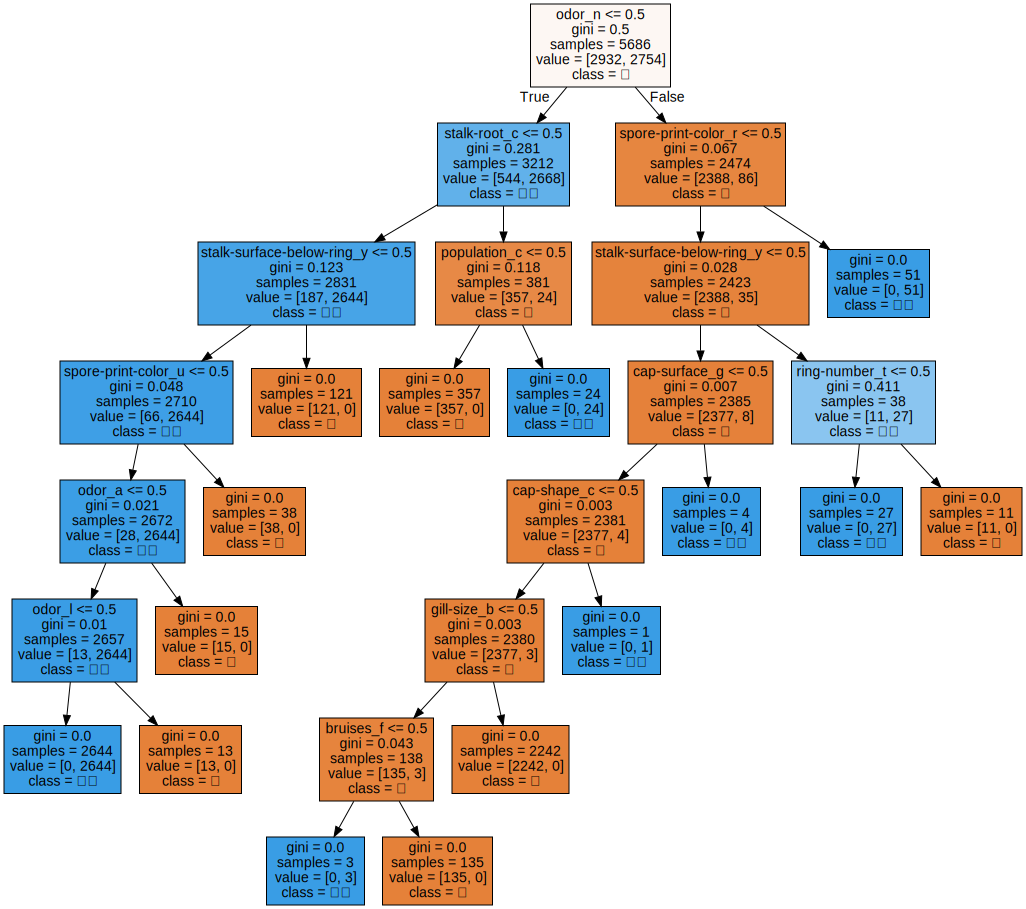

In [80]:
display(graphviz.Source(dot_graph))

# <= 0.5 해당 컬럼명의 원핫 인코딩된 데이터가 0 / 1 인지 판단하는 조건
#gini : 지니 불순도
# samples : 전체 데이터의 갯수
# value : 클래스별 개수[독 / 식용]
# class : 어떤 데이터가 많이 있는가

- 의사 결정 나무 모델은 완벽주의적 성격이 강하다
- 사전 가지치기를 하지 않으면 완벽하게 나눌 때까지 멈추지 않는다.
- 모델이 복잡해질 가능성이 높고 과대적합에 빠질 위험이 크다.
- 그럼 사전 가지치기 진행해보고 모델에 모양을 살펴보자

### 하이퍼 파라미터 튜닝(사전 가지치기 진행)

# 모델 객체 생성(max_depth = 3, max_leaf_nodes = 7, min_samples_leaf = 30)

# 결정 트리 모델 초기화 및 하이퍼파라미터 설정


In [96]:
# 모델 객체 생성()
tree_model2 = DecisionTreeClassifier(
    max_depth=3,           # 최대 깊이
    max_leaf_nodes=7,      # 최대 리프 노드 개수
    min_samples_leaf=30   # 최소 리프 노드 샘플 개수
)

In [98]:
# 모델 학습
tree_model2.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=7, min_samples_leaf=30)

In [100]:
# 모델 평가(train set) - score 이용
tree_model2.score(X_train, y_train)

0.9808301090397468

##### 모델 평가(test set) - score 이용
tree_model2.score(X_test, y_test)

In [103]:
# 파일 내보내기
export_graphviz(tree_model2, #시각화 시켜줄 모델의 이름
               out_file='tree2.dot', # 파일 명 및 저장 경로 설정
               feature_names = X_one_hot.columns, # 원핫 인코딩 된 컬럼명 기입
               class_names = ['독', '식용'], # 클래스(label)이름 설정
                impurity = True, # 지니불순도 표시
               filled = True) # 노드가 클래스로 구분 되도록 색상 채워주기

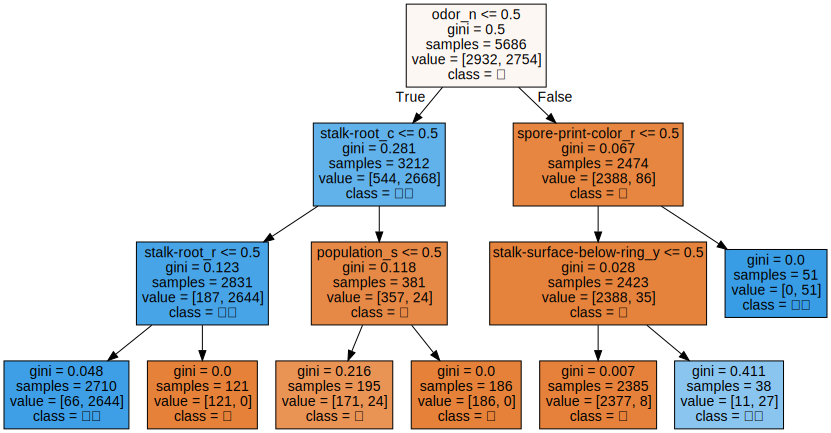

In [104]:
with open('tree2.dot', encoding='UTF8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### 특성 선택 확인해보기(feature selection)
- 지도 학습 모델에서는 데이터의 각 특성들의 중요도를 출력할 수 있음 (정답 관여율이 얼마나 되는가?)

- 각 특성들은 0~ 1 사이의 실수값을 가진다. (중요도 값) / 모든 특성 중요도의 합은 1이 나온다

- 0 이 나오는 컬럼은 모델이 정답을 예측하는데 전혀 도움이 되지 않는다.

- 모델이 정답을 예측하는데 도움이 많이 되는 특성일수록 1에 가깝게 나온다.

- 만약 특성 중요도가 1인 컬럼이 있다 -> 이 특성 하나만으로 정답을 정확하게 예측할수 있다.

In [110]:
fi = tree_model.feature_importances_
fi

array([0.00000000e+00, 7.02103219e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.80252522e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.06659270e-03, 0.00000000e+00, 1.04007607e-02, 0.00000000e+00,
       0.00000000e+00, 9.10945096e-03, 0.00000000e+00, 6.23355113e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.32614456e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.79373456e-01, 0.00000000e+00, 0.00000000e+00,
      

In [115]:
# 특성 중요도를 데이터 프레임화 시켜보자

fi_df = pd.DataFrame(fi, index=X_one_hot.columns, columns = ['특성 중요도'])
fi_df

,특성 중요도
cap-shape_b,0.000000
cap-shape_c,0.000702
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [116]:
fi_df_sorted = fi_df.sort_values(by='특성 중요도', ascending=False)
print(fi_df_sorted)

                              특성 중요도
odor_n                      0.623355
stalk-root_c                0.179373
stalk-surface-below-ring_y  0.090811
spore-print-color_r         0.034164
spore-print-color_u         0.025833
...                              ...
gill-color_g                0.000000
gill-color_e                0.000000
gill-color_b                0.000000
gill-size_n                 0.000000
habitat_w                   0.000000

[117 rows x 1 columns]


In [118]:
# 지금은 데이터가 뒤죽박죽이다. 특성중요도를 기준으로 내림차순정렬을 해보자.
fi_df.sort_values(by = '특성 중요도', ascending= False, inplace = True)
fi_df

,특성 중요도
odor_n,0.623355
stalk-root_c,0.179373
stalk-surface-below-ring_y,0.090811
spore-print-color_r,0.034164
spore-print-color_u,0.025833
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000


- tree 모델 내부 시각화 표를 보면 특성 중요도가 높은 odr_n 이 가장 먼저 나오는걸 확인할수 있다
- 정답 관여율, 중요도가 가장 높은 컬럼을 우선적으로 고려해야 효율적으로 데이터를 분류할수 있기 때문에
- 현재 버섯 데이터는 odor_n 이라는 컬럼이 60% 이상의 중요도를 혼자 차지하고 있다.
    모델이 학습하는데 용이하고 높은 정확도를 손쉽게 얻을 수 있다.
    


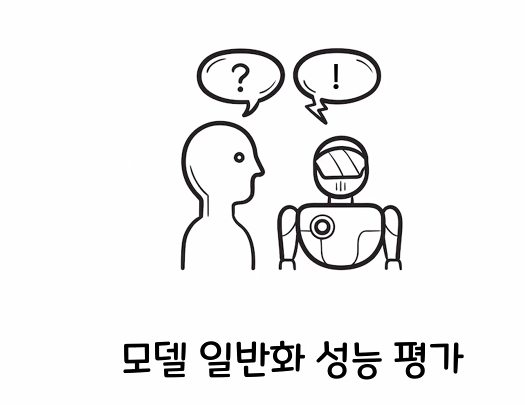

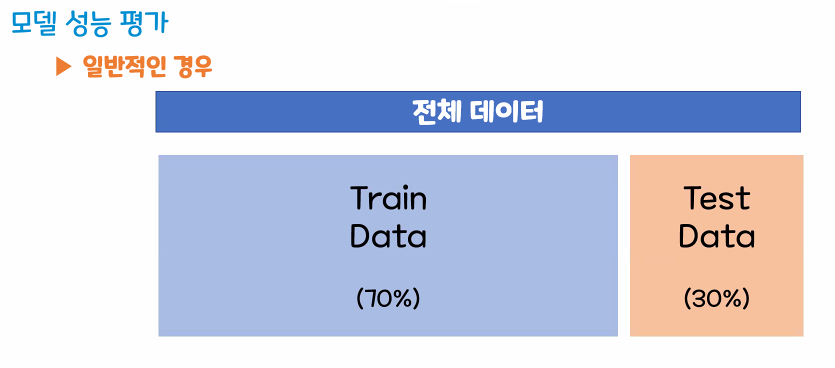

### 교차검증
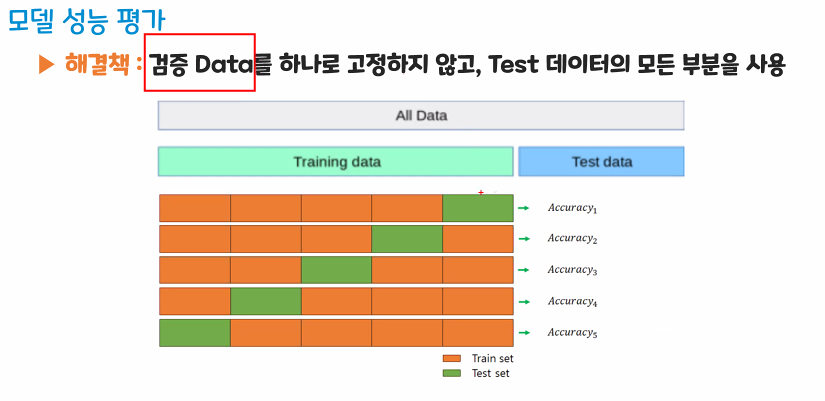

50,000 이라고 가정하고 40,000개 학습 10,000 평가

그후 평가 데이터는 다시 train 데이터로 넘어가고 다음 test로 쓴다

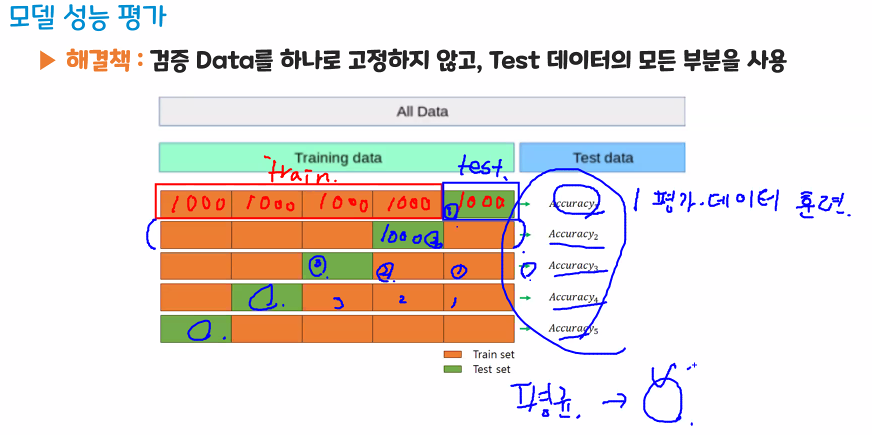

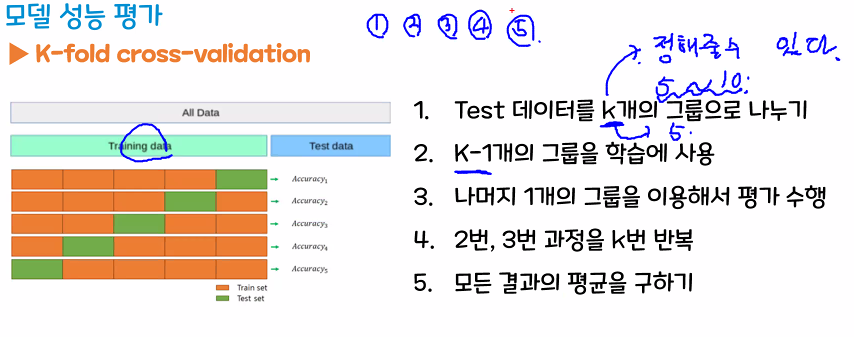

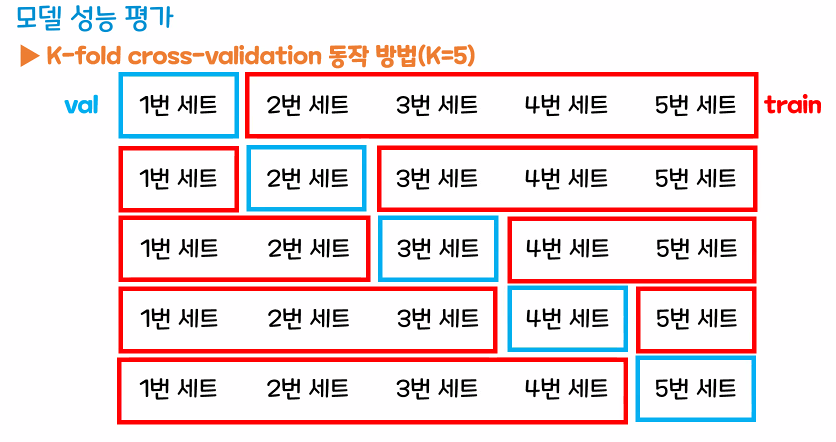

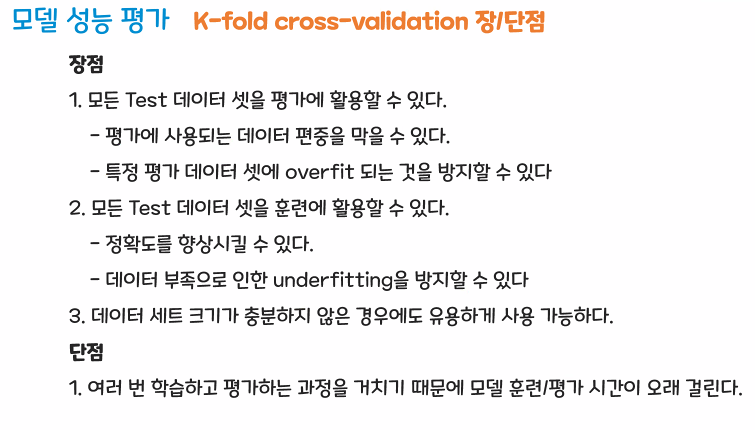       

### 교차 검증
- 모델의 일반화 성능 기대값을 확인해보는 방법
- 주의) 실제로 모델을 학습하는 방법이 아님. 모델의 기대 성능값을 살펴보는 도구다.

In [119]:
# 교차 검증 modelimport 하기

from sklearn.model_selection import cross_val_score

In [120]:
tree_model3 = DecisionTreeClassifier(
    max_depth=3,           # 최대 깊이
    max_leaf_nodes=7,      # 최대 리프 노드 개수
    min_samples_leaf=30   # 최소 리프 노드 샘플 개수
)

In [121]:
# cross_val_score(모델 이름, 문제 데이터, 정답 데이터, cv = 분할할 값) 
rs = cross_val_score(tree_model3, X_one_hot, y, cv= 5 )
rs

array([1.        , 0.99015385, 0.78953846, 1.        , 0.62561576])

In [122]:
# 평균\
rs.mean()

0.8810616142478211

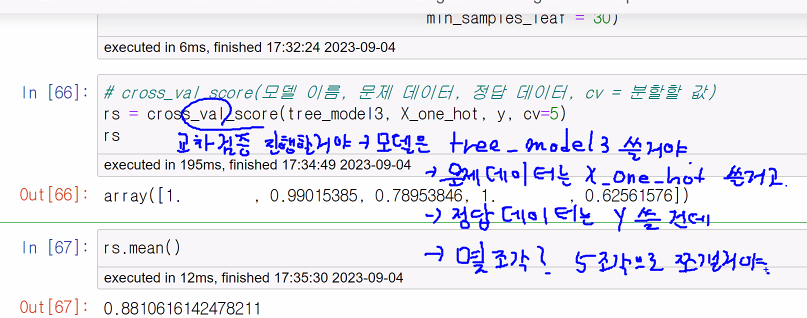

분류 모델 독과 식용 -> 분류 clasifier 
집값 회귀 디시젼 트리 집값을 예측하는걸 만들수 있음
게임승률 -> 승률에 대한 분석 모델 -> 승률 예측

회귀 -> 이상탐지모델 
데이터를 어떤것을 학습하냐에 따라 용도가 달라짐

약한인공지능  --  